In [1]:
%matplotlib inline

import matplotlib
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import the excel file and call it xls_file
xls_file = pd.ExcelFile('daily_met.xls')
xls_file

In [3]:
# View the excel file's sheet names
xls_file.sheet_names
df_water = xls_file.parse('w_level')
df_water.head()

,date_wlevel,w_level
0,2014-11-01,32.646
1,2014-11-02,32.796
2,2014-11-03,32.919
3,2014-11-04,33.001
4,2014-11-05,33.049


date_wlevel    882
w_level        870
dtype: int64

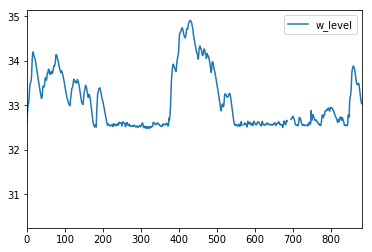

In [4]:
df_water.plot()
df_water.count()
#df.interpolate().count()

date_wlevel    882
w_level        882
dtype: int64

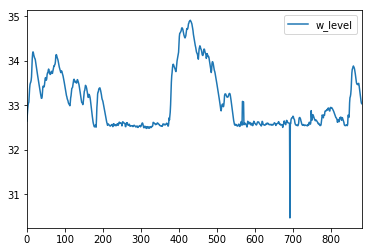

In [5]:
df = df_water.interpolate(method='spline', order=4)
df.plot()
df.count()

In [6]:
df['date_wlevel'] = pd.to_datetime(df['date_wlevel'],format='%Y-%m-%d')

for daysDelta in range(-20,-9):    #CHANGE HERE
        key = 't_wlevel'+str(daysDelta)
        df[key] = np.nan
print(df.head())

  date_wlevel  w_level  t_wlevel-20  t_wlevel-19  t_wlevel-18  t_wlevel-17  \
0  2014-11-01   32.646          NaN          NaN          NaN          NaN   
1  2014-11-02   32.796          NaN          NaN          NaN          NaN   
2  2014-11-03   32.919          NaN          NaN          NaN          NaN   
3  2014-11-04   33.001          NaN          NaN          NaN          NaN   
4  2014-11-05   33.049          NaN          NaN          NaN          NaN   

   t_wlevel-16  t_wlevel-15  t_wlevel-14  t_wlevel-13  t_wlevel-12  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

   t_wlevel-11  t_wlevel-10  
0          NaN          NaN  
1          NaN          NaN  
2          NaN      

In [7]:
for index, row in df.iterrows():
    for daysDelta in range(-20,-9): #loops through days CHANGE HERE
        key = 't_wlevel'+str(daysDelta)

        # will be true if the difference of days is the one you are looking for
        booleanTimeDelta = ((df.loc[:,'date_wlevel'] -row['date_wlevel']).dt.days == daysDelta) 

        # if any are true find them and assign it  
        if any(booleanTimeDelta):
            df.loc[index:index+1,key] = df.loc[booleanTimeDelta,'w_level'].values

In [8]:
print(df.head(n=20))

   date_wlevel  w_level  t_wlevel-20  t_wlevel-19  t_wlevel-18  t_wlevel-17  \
0   2014-11-01   32.646          NaN          NaN          NaN          NaN   
1   2014-11-02   32.796          NaN          NaN          NaN          NaN   
2   2014-11-03   32.919          NaN          NaN          NaN          NaN   
3   2014-11-04   33.001          NaN          NaN          NaN          NaN   
4   2014-11-05   33.049          NaN          NaN          NaN          NaN   
5   2014-11-06   33.070          NaN          NaN          NaN          NaN   
6   2014-11-07   33.229          NaN          NaN          NaN          NaN   
7   2014-11-08   33.375          NaN          NaN          NaN          NaN   
8   2014-11-09   33.463          NaN          NaN          NaN          NaN   
9   2014-11-10   33.500          NaN          NaN          NaN          NaN   
10  2014-11-11   33.519          NaN          NaN          NaN          NaN   
11  2014-11-12   33.558          NaN          NaN   

In [9]:
# Import the excel file and call it xls_file
xls_file_2 = pd.ExcelFile('dates_aquisition.xls')
xls_file_2
xls_file_2.sheet_names

[u'Dates_aquisition']

In [10]:
df_dates = xls_file_2.parse('Dates_aquisition')
df_dates.head()

,date_aqui
0,2014-11-22
1,2014-12-28
2,2015-01-02
3,2015-02-04
4,2015-02-16


In [11]:
merge_df = pd.merge(df, df_dates, left_on = ['date_wlevel'], right_on = ['date_aqui'])

In [12]:
merge_df.drop('date_aqui', axis=1, inplace=True)
merge_df.drop(0, axis=0, inplace=True)
merge_df.head()

,date_wlevel,w_level,t_wlevel-20,t_wlevel-19,t_wlevel-18,t_wlevel-17,t_wlevel-16,t_wlevel-15,t_wlevel-14,t_wlevel-13,t_wlevel-12,t_wlevel-11,t_wlevel-10
1,2014-12-28,33.814,33.205,33.157,33.158,33.194,33.328,33.426,33.425,33.424,33.413,33.451,33.522
2,2015-01-02,33.699,33.426,33.425,33.424,33.413,33.451,33.522,33.603,33.622,33.587,33.563,33.594
3,2015-02-04,33.659,33.988,34.117,34.139,34.127,34.090,34.058,34.038,34.002,33.955,33.915,33.862
4,2015-02-16,33.125,33.788,33.751,33.735,33.752,33.775,33.754,33.718,33.689,33.659,33.617,33.572
5,2015-02-28,33.391,33.470,33.421,33.369,33.319,33.268,33.217,33.190,33.145,33.125,33.100,33.057


In [13]:
merge_df.to_csv('wlevel_dataframe.csv')